# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 2 — Optimizers

### 2.6 How does Adadelta works?

> First post (own_tutorial_1.ipynb).

> Second post (own_tutorial_2.ipynb).

> Third post (own_tutorial_3.ipynb).

> Fourth post (own_tutorial_4.ipynb).

> Fifth post (own_tutorial_5.ipynb).

> Sixth post (own_tutorial_6.ipynb).

> Seventh post (own_tutorial_7.ipynb).

> Previous post (own_tutorial_8.ipynb).

Adadelta was developed to eliminate the need for a learning rate. In this method, we store the square of gradients and updates but in a restricted manner in accumulators.

And, we will calculate the update as follow:



In [13]:
%%latex
\begin{gather*}
    update = - gradient * \frac{\sqrt{accumulatir\_update + epsilon}}{\sqrt{accumulator\_gradient + epsilon}}
\end{gather*}

<IPython.core.display.Latex object>

This post is divided into 3 sections.

1. Adadelta in 1 variable
2. Adadelta animation for 1 variable
3. Adadelta in multi-variable function

## #1 Adadelta in 1 variable

In this method, we store the square of gradients and update in a restricted manner in accumulators.

Adadelta algorithm in simple language is as follows:

> Step 1 - Set starting point

> Step 2 - Initiate accumulator_gradient = 0, accumulator_update = 0, set rho = 0.95, epsilon = 10**-5

> Step 3 - Initiate loop

>          Step 3.1 - calculate accumulator_gradient = rho * accumulator_gradient + (1 - rho) * gradient**2

>          Step 3.2 - calculate update as stated above

>          Step 3.3 - calculate accumulator_update = rho * accumulator_update + (1 - rho) * update**2

>          Step 3.4 - add update to point

Now, before moving forward let us talk about two things:

#. First, what about the learning rate?
Adadelta was developed to eliminate the need for a learning rate. But, for the sake of formality, because all the Optimizers in Chapter 2 have a learning rate, we will use learning rate = 1 and use it in step 3.4

So, Step 3.4 is add update * (learning rate = 1) to point

#. Second, You must have noticed that when we enter the loop the first time, the accumulator_update is 0. So, to make sure of progress, we have added epsilon to accumulator_update.

We can say that epsilon is used here to kick start the Adadelta Optimizer.

> Note — You can use different values of epsilon if you want and the convergence rate will depend on the magnitude of epsilon.

So, the Adadelta algorithm in simple language is as follows:

> Step 1 - Set starting point and set **learning_rate = 1**

> Step 2 - Initiate accumulator_gradient = 0, accumulator_update = 0, set rho = 0.95, epsilon = 10**-5

> Step 3 - Initiate loop

>          Step 3.1 - calculate accumulator_gradient = rho * accumulator_gradient + (1 - rho) * gradient**2

>          Step 3.2 - calculate update as stated above

>          Step 3.3 - calculate accumulator_update = rho * accumulator_update + (1 - rho) * update**2

>          Step 3.4 - add (update * __learning_rate__) to point

First, let us define the function and its derivative and we start from x = -1

In [14]:
%%latex
\begin{gather*}
    y = f(x) = x - x^{3} \\
    \frac{dy}{dx} = f'(x) = 1 - 3x^{2} \\  
\end{gather*}

<IPython.core.display.Latex object>

In [15]:
import numpy as np
np.random.seed(42)

def f(x):                           # function definition                        
    return x - x**3

def fdash(x):                       # function derivative definition
    return 1 - 3*(x**2)

And now Adadelta

In [16]:
point = -1                                   # step 1
learning_rate = 1

rho = 0.95                                   # step 2
epsilon = 10**-5
accumulator_gradient = 0
accumulator_update = 0

for i in range(1000):                        # step 3
    accumulator_gradient = rho * accumulator_gradient + (1 - rho) * fdash(point)**2 # step 3.1
                                             
    update = -fdash(point) * (accumulator_update + epsilon)**0.5 / (accumulator_gradient + epsilon)**0.5    # step 3.2
                                             
    accumulator_update = rho * accumulator_update + (1 - rho) * update**2   # step 3.3
                                           
    point += learning_rate * update          # step 3.4
 
point 

-0.5773502691896257

And, we have successfully implemented Adadelta in Python.

## #2 Adadelta animation for better understanding

Everything thing is the same as what we did earlier for the animation of the previous 5 optimizers. We will create a list to store starting point and updated points in it and will use the iᵗʰ index value for iᵗʰ frame of the animation.

In [17]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter
point_adadelta = [-1]                      # initiating list with
                                           # starting point in it
point = -1                                 # step 1
learning_rate = 1

rho = 0.95                                 # step 2
epsilon = 10**-5
accumulator_gradient = 0
accumulator_update = 0

for i in range(1000):                      # step 3
    accumulator_gradient = rho * accumulator_gradient + (1 - rho) * fdash(point)**2     # step 3.1
                                           
    update = -fdash(point) * (accumulator_update + epsilon)**0.5 / (accumulator_gradient + epsilon)**0.5   # step 3.2 
                                           
    accumulator_update = rho * accumulator_update + (1 - rho) * update**2   # step 3.3
                                           
    point += learning_rate * update        # step 3.4
    
    point_adadelta.append(point)           # adding updated point to
                                           # the list
    
point                                      # Minima


-0.5773502691896257

We will do some settings for our graph for the animation. You can change them if you want something different.

Text(0.5, 1.0, 'Adadelta, learning_rate = 1')

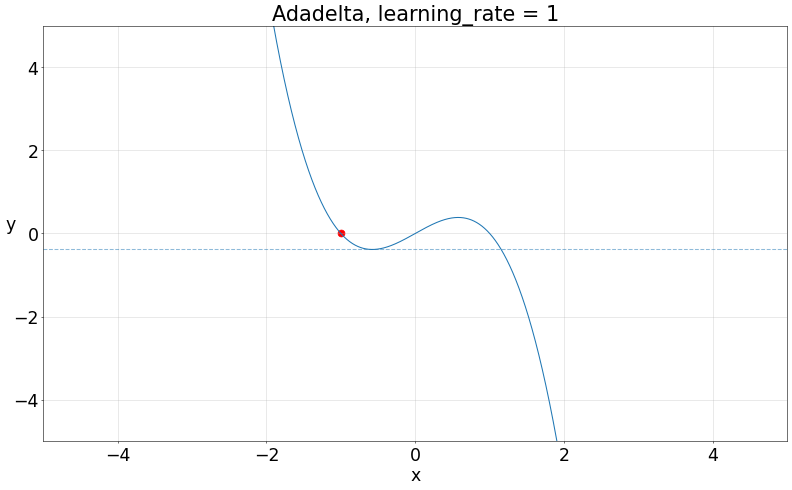

In [18]:
plt.rcParams.update({'font.size': 25})
fig = plt.figure(dpi = 50)

fig.set_figheight(10.80)
fig.set_figwidth(19.20)

x_ = np.linspace(-5, 5, 10000)
y_ = f(x_)

ax = plt.axes()

ax.plot(x_, y_)
ax.grid(alpha = 0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)
ax.scatter(-1, f(-1), color = 'red', s=100)
ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
ax.set_title('Adadelta, learning_rate = 1')

Now we will animate the Adadelta optimizer.

In [19]:
def animate(i):
    ax.clear()
    ax.plot(x_, y_)
    ax.grid(alpha = 0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
    ax.set_title('Adadelta, learning_rate = 1')
    
    ax.scatter(point_adadelta[i], f(point_adadelta[i]), color = 'red', s=100)

The last line in the code snippet above is using the iᵗʰ index value from the list for iᵗʰ frame in the animation.

In [20]:
anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 10)
anim.save('2.6.SGD_Adadelta.gif')

We are creating an animation that only has 200 frames and the gif is at 50 fps or frame interval is 20 ms.

It is to be noted that in less than 200 iterations we have reached the minima.

## #3 Adadelta in multi-variable function (2 variables right now)

Everything is the same, we only have to initialize point (1, 0) and accumulator_gradient = 0 and accumulator_update = 0 but with shape (2, 1) and replace fdash(point) with gradient(point).

But first, let us define the function, its partial derivatives and, gradient array

In [21]:
%%latex
\begin{gather*}
    f = 2x^{2} + 2xy + 2y^{2} - 6x \\
        \text{We know that Minima for this function is at (2, -1)} \\
        \text{and we will start from (1, 0)}\\
        \text{The partial derivatives are}\\
        \frac{\partial f}{\partial x} = 4x + 2y - 6 \\
        \frac{\partial f}{\partial y} = 2x + 4y \\
 \end{gather*}

<IPython.core.display.Latex object>

In [22]:
def f(x, y):                                    # function
    return 2*(x**2) + 2*x*y + 2*(y**2) - 6*x    # definition

def fdash_x(x, y):                              # partial derivative
    return 4*x + 2*y - 6                        # w.r.t x

def fdash_y(x, y):                              # partial derivative
    return 2*x + 4*y                            # w.r.t y

def gradient(point):                            # gradients
    return np.array([[     fdash_x(point[0][0], point[1][0])     ],
                     [     fdash_y(point[0][0], point[1][0])     ]], dtype = np.float64)    

Now the steps for Adadelta in 2 variables are

In [23]:
point = np.array([[   1   ],                     # step 1
                  [   0   ]], dtype = np.float64)
learning_rate = 1

rho = 0.95                                       # step 2
epsilon = 10**-5
accumulator_gradient = np.array([[   0   ],
                                 [   0   ]], dtype = np.float64)
accumulator_update = np.array([[   0   ],
                               [   0   ]], dtype = np.float64)

for i in range(1000):                            # step 3
    accumulator_gradient = rho * accumulator_gradient + (1 - rho) * gradient(point)**2 # step 3.1
    update = -gradient(point) * (accumulator_update + epsilon)**0.5 / (accumulator_gradient + epsilon)**0.5 # step 3.2
    accumulator_update = rho * accumulator_update + (1 - rho) * update**2 # step 3.3 
    point += learning_rate * update               # step 3.4
    
point                                            # Minima

array([[ 2.],
       [-1.]])

I hope now you understand how Adadelta works.